<a href="https://colab.research.google.com/github/AYA-NASH/NN_with_TensorFlow/blob/main/01_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression problems 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

## Basic Steps for modeling

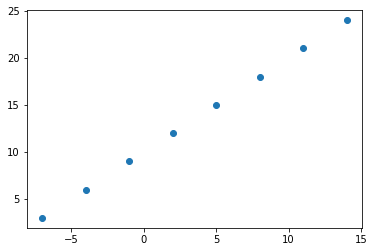

In [ ]:
# 1- Defining data:

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
# Building the Model:

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y , epochs = 100)




Epoch 1/100
1/1 [==============================] - 0s 250ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6m

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[30.158512]], dtype=float32)

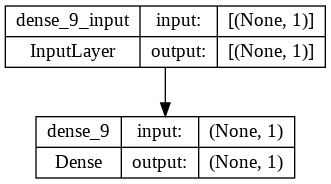

In [ ]:
# from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Improving Model:

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(lr = 0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y , epochs = 100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 332ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5493 - mae: 10.5493
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 9.7151 - mae: 9.7151
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0089 - mae: 9.0089
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2745 - mae: 8.2745
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5150 - mae: 7.5150
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 5.8979 - mae: 5.8979
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 5.0335 - mae: 5.0335
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 4.1245 - m

In [ ]:
model.predict([40.0])

1/1 [==============================] - 0s 48ms/step


array([[51.736885]], dtype=float32)

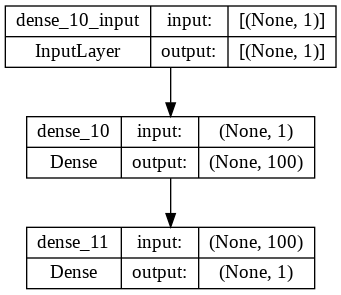

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Evaluating model:

### 1- Visualizing Data

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)

y = X + 10

print(X)
print(y)

[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96]
[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66  70  74  78  82  86  90  94  98 102 106]


In [ ]:
# Split the data:
X_train = X[:40] # first 40 elements from X
y_train = y[:40]

X_test = X[40:] # last elements after the 40_th element
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

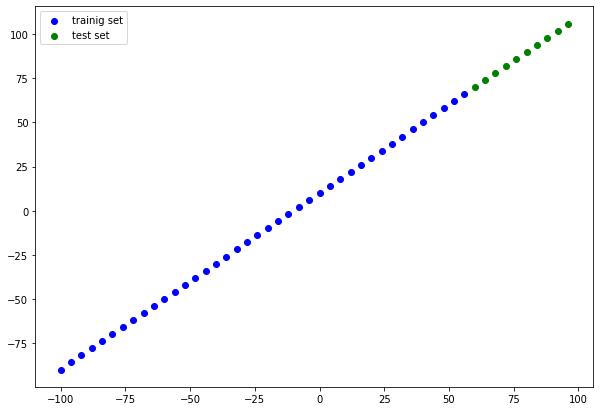

In [ ]:
# Visualizing data sets:
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, c = "b", label = "trainig set")
plt.scatter(X_test, y_test, c = "g", label = "test set")
plt.legend();

### 2- Model Summary

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis = -1), y_train , epochs = 100, verbose = 0)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 6         
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


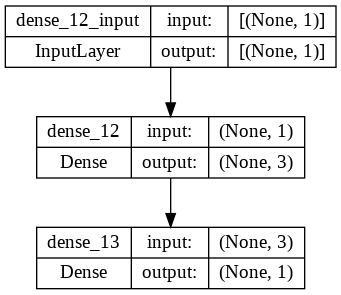

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### 3- Visulaizing predictions:

In [ ]:
# Make Predictions on Test set:
y_predict = model.predict(X_test)

y_predict

1/1 [==============================] - 0s 44ms/step


array([[ 73.487045],
       [ 78.20689 ],
       [ 82.92673 ],
       [ 87.64657 ],
       [ 92.3664  ],
       [ 97.086235],
       [101.806076],
       [106.52592 ],
       [111.24575 ],
       [115.96559 ]], dtype=float32)

In [ ]:
def plot_predictions(training_data = X_train,
                     training_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_predict):
  plt.figure(figsize = (10,7))
  # plot the relation of the training set:
  plt.scatter(training_data, training_labels, c = "b", label = "trainig set")
  # Test set:
  plt.scatter(test_data, test_labels, c = "g", label = "test set")
  # the relation between the test data and predictions:
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  plt.legend();

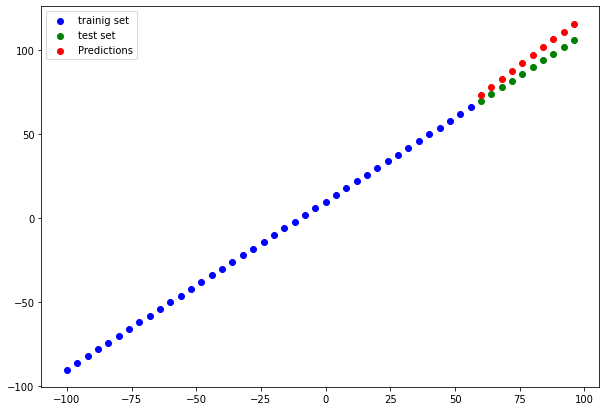

In [ ]:
plot_predictions()

### 4- With Evaluation Mertics

In [ ]:
#  Evaluating on test set:
model.evaluate(X_test, y_test) # returns the loss and the metric defined in the model compilation

1/1 [==============================] - 0s 99ms/step - loss: 6.7263 - mae: 6.7263


[6.726319789886475, 6.726319789886475]

In [ ]:
print(y_predict.shape)
print(y_test.shape)

(10, 1)
(10,)


In [ ]:
y_test = tf.constant(y_test)
y_predict = tf.squeeze(tf.constant(y_predict))

print(y_predict.shape)
print(y_test.shape)


(10,)
(10,)


In [ ]:
# Using other metrics:
tf.metrics.mean_absolute_error(y_test, y_predict ).numpy()

6.72632

In [ ]:
tf.keras.losses.MAE(y_test, y_predict).numpy()

6.72632

In [ ]:
# MSE:
tf.keras.losses.MSE(y_test, y_predict).numpy()

49.518257

In [ ]:
# Huber:
h = tf.keras.losses.Huber()
h(y_test, y_predict).numpy()

6.22632

## Running experiments to improve the model:

In [ ]:
X_train , y_train

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66]))

In [ ]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1)]
)

# Compile:
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = "mae")

# fit:
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 200 , verbose = 0)

In [ ]:
# Visualize data:
# 1- make predictions:
y_pred = model.predict(X_test)
print(y_pred)

1/1 [==============================] - 0s 39ms/step
[[ 68.735725]
 [ 72.648026]
 [ 76.56134 ]
 [ 80.47291 ]
 [ 84.38448 ]
 [ 88.29627 ]
 [ 92.20821 ]
 [ 96.12037 ]
 [100.03266 ]
 [103.94604 ]]


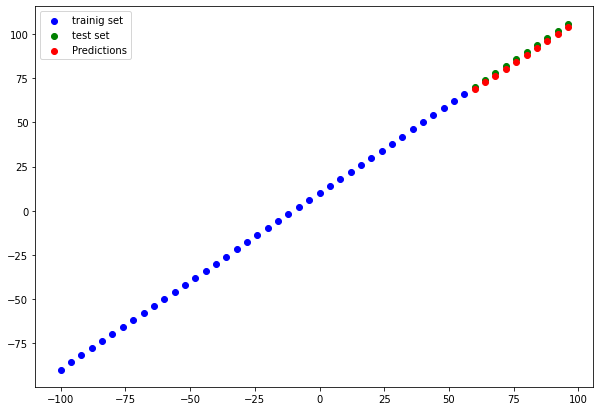

In [ ]:
plot_predictions(predictions = y_pred)

In [ ]:
y_test.shape , y_pred.shape

(TensorShape([10]), (10, 1))

In [ ]:
# Evaluate it:
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred)).numpy()

2.8173254

## Saving the Model:


In [ ]:
#  1- with savedModel format:
model.save("savedFormat_model")

In [ ]:
#  2- whith HDF5 format:
model.save("HDF5_saved_model.h5")

## Load and used the saved model:

In [ ]:
# the same method is used for both formats:

# Loading SavedModel:
loaded_savedModel_format = tf.keras.models.load_model("/content/savedFormat_model")
loaded_savedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                100       
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                100       
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_savedModel_format_pred = loaded_savedModel_format.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [ ]:
# Comparing both models:
y_pred == loaded_savedModel_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading the HDF5 Model:
h5_loaded = tf.keras.models.load_model("HDF5_saved_model.h5")
h5_loaded.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                100       
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred == h5_loaded.predict(X_test)

1/1 [==============================] - 0s 40ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# A Larger Example

In [ ]:
# import files:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#1- get the data using pandas:
# insurance_data is a pandas data frame
insurance_data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# 2- Hot_encode data to get all features in numerical form:
# to hot encode with pandas use get_dummies(data_frame) method:
insurance = pd.get_dummies(insurance_data)

insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


**creating X & Y data**

In [ ]:
y = insurance['charges']

# extract all other columns except the charges to create X_train set
col = "charges"
X = insurance.loc[:, insurance.columns != col]

# Another way to split the data:
# X = insurance.drop("charges", axis = 1)


# # Create the train and test set
# y_train = tf.constant(y[:937])
# y_test = tf.constant(y[937:])
# X_train = tf.constant(X[:937])
# X_test = tf.constant(X[937:])


In [ ]:
# Create train and test set using Sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# len(X_train), len(X_test)
X_train.shape , y_train.shape

((1070, 11), (1070,))

**Visulaizing data**

In [ ]:
# Visualizing data sets:
plt.figure(figsize = (10,7))
plt.scatter(X_train[:,0], y_train, c = "b", label = "trainig set")
plt.scatter(X_test[:,0], y_test, c = "g", label = "test set")
plt.legend();

**Build the Model**

In [ ]:
tf.random.set_seed(42)

# model Structure:

model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# Compile:
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = "mae")

# fit:
history  = model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0 )

In [ ]:
# evaluate it :
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8627.9668 - mae: 8627.9658


[8627.966796875, 8627.9658203125]

Text(0.5, 0, 'ephocs')

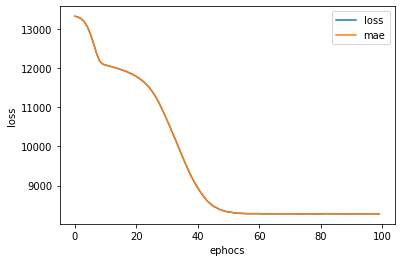

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("ephocs")

## Presproccessing Data (Normalization and Standardaization)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# insurance_data is a pandas data frame
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# insurance_data

In [ ]:
# creating Column Transformer:
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker","region"] )
)


In [ ]:
# X & Y data:
from sklearn.model_selection import train_test_split

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit the column transformer on the X_train:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
tf.random.set_seed(42)

# model Structure:

model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# Compile:
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = "mae")

# fit:
history = model.fit(tf.expand_dims(X_train_normal, axis = -1), y_train, epochs = 100, verbose = 0 )

In [ ]:
# evaluate it :
model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8622.1045 - mae: 8622.1045


[8622.1044921875, 8622.1044921875]

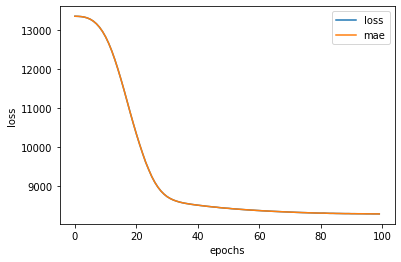

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable